In [1]:
import pandas as pd
from pathlib import Path
import json
import numpy as np
import geopandas as gpd
import folium
import branca.colormap as cm
import libpysal
# from libpysal.common import np
import matplotlib.pyplot as plt
import seaborn as sns

from libpysal.weights import Queen, Rook, KNN
import splot
from esda.moran import Moran
from splot.esda import moran_scatterplot
from collections import OrderedDict
import polars as pl

pd.set_option('display.max_columns', 500)
# print("Hi")

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import matplotlib
# fig, ax = plt.subplots(figsize=(15, 20))
font = {
    # 'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 16
}

In [9]:
ROOT = Path.cwd().parent.parent
RAW = ROOT / 'data' / 'raw'
PROCESSED = ROOT / 'data' / 'processed'
OUT = ROOT / 'out'
ANALYSIS = ROOT / 'data' / 'analysis'

In [10]:
gdf_2 = gpd.read_file(PROCESSED / 'predictors_msoa8.geojson' )

/Users/toby/anaconda3/envs/connectivity-analysis/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='primary', ylabel='Count'>

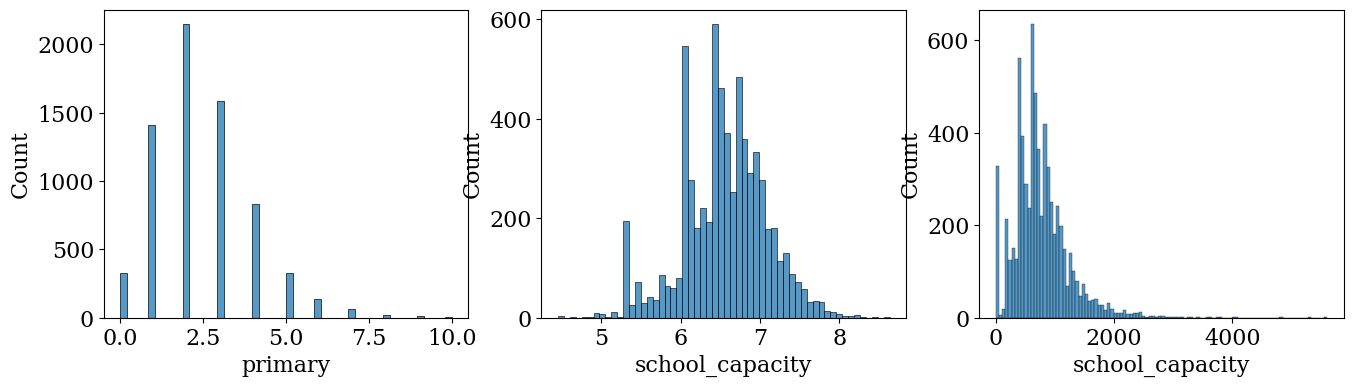

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(gdf_2['school_capacity'], ax=ax[2])
sns.histplot(np.log(gdf_2['school_capacity']), ax=ax[1])
sns.histplot(gdf_2['primary'], ax=ax[0])



In [12]:
# still some holes in the data... # some valid MSOA are missing...

# fig, ax = plt.subplots(figsize=(20, 10))
# gdf_2.plot(column='school_capacity', ax=ax, legend=True, scheme='qua')
# # legend = ax.get_legend()
# # legend.set_title("Number of Primary Schools")
# ax.set_axis_off()

In [13]:
gdf_2.school_capacity.max()
gdf_2.school_capacity.min()

0.0

Text(0.5, 1.0, 'School Capacity')

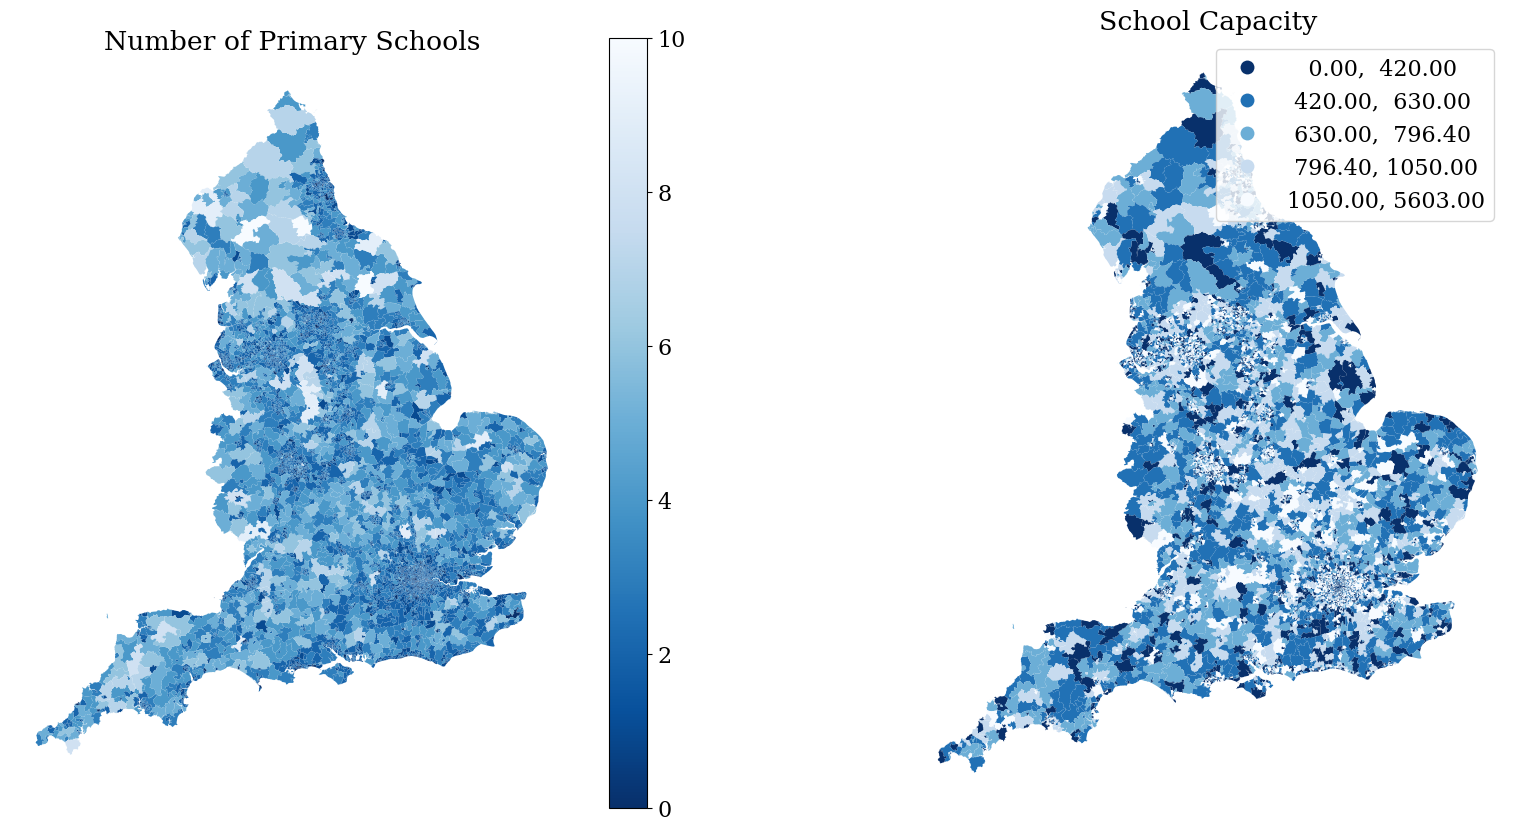

In [14]:
import matplotlib.colors as colors
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
gdf_2.plot(column='primary', ax=ax[0], legend=True, cmap='Blues_r')
# gdf_2.plot(column='school_capacity', ax=ax[1], legend=True, norm=colors.LogNorm(vmin=10, vmax=gdf_2.school_capacity.max()))
gdf_2.plot(column='school_capacity', ax=ax[1], scheme='quantiles', legend=True, cmap='Blues_r')
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_title('Number of Primary Schools')
ax[1].set_title('School Capacity')

Text(0.5, 1.0, 'School Capacity')

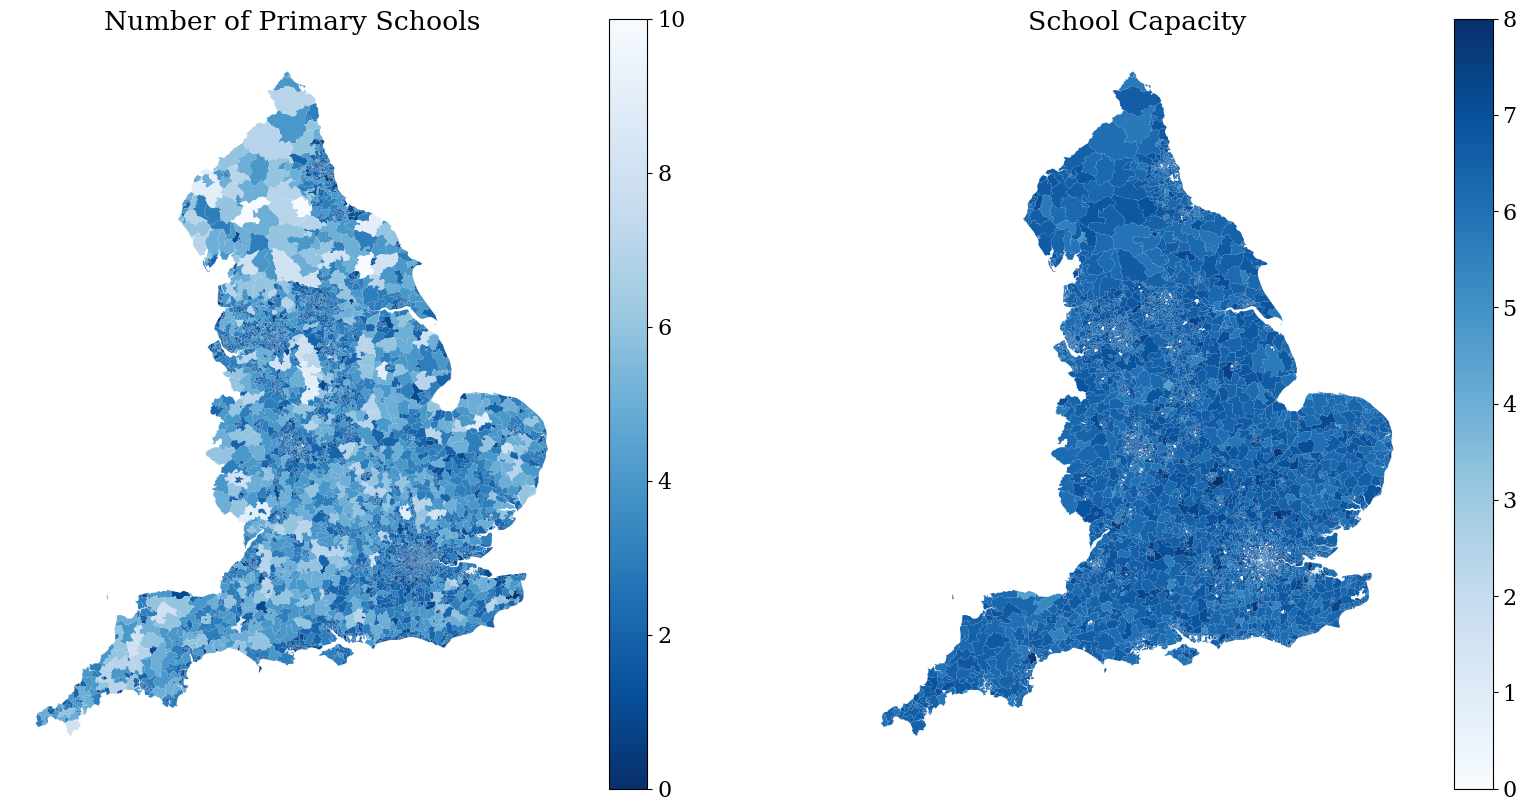

In [15]:
import matplotlib.colors as colors
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
gdf_2['log_school_capacity'] = np.log(gdf_2['school_capacity']+1)
gdf_2.plot(column='primary', ax=ax[0], legend=True, cmap='Blues_r')
# gdf_2.plot(column='school_capacity', ax=ax[1], legend=True, norm=colors.LogNorm(vmin=10, vmax=gdf_2.school_capacity.max()))
gdf_2.plot(column='log_school_capacity', ax=ax[1], legend=True, cmap='Blues', vmin=0, vmax=8)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_title('Number of Primary Schools')
ax[1].set_title('School Capacity')

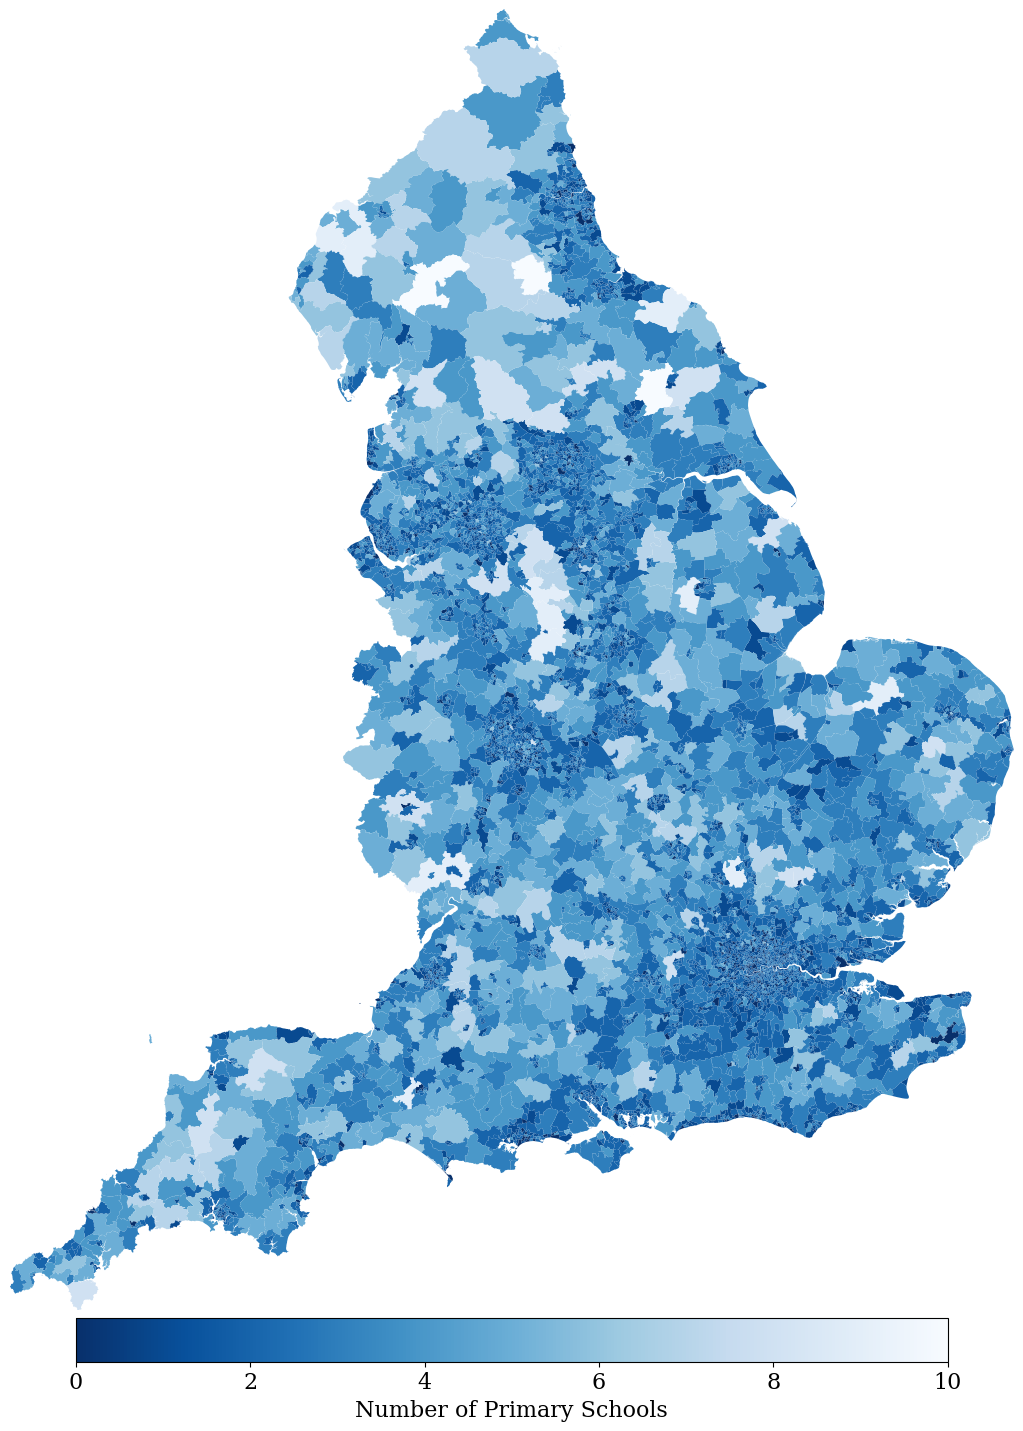

In [16]:
import matplotlib
fig, ax = plt.subplots(figsize=(15, 20))
font = {
    # 'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 16
}

matplotlib.rc('font', **font)
gdf_2.plot(column='primary', legend=True, cmap='Blues_r', ax=ax, 
           legend_kwds={'label': "Number of Primary Schools", 
                        
                        'shrink':0.75, 'orientation':'horizontal',
                        # 'pad': -0.00005,
                        'pad': 0.005,
                        # 'size':20
                        })
ax.set_axis_off()
# ax.set_title('Number of Primary Schools')
ax.margins(-0.00)
# fig.axes[1].tick_params(labelsize=10)

fig.savefig(OUT / "n_schools_choropleth.png", dpi=500, bbox_inches='tight')

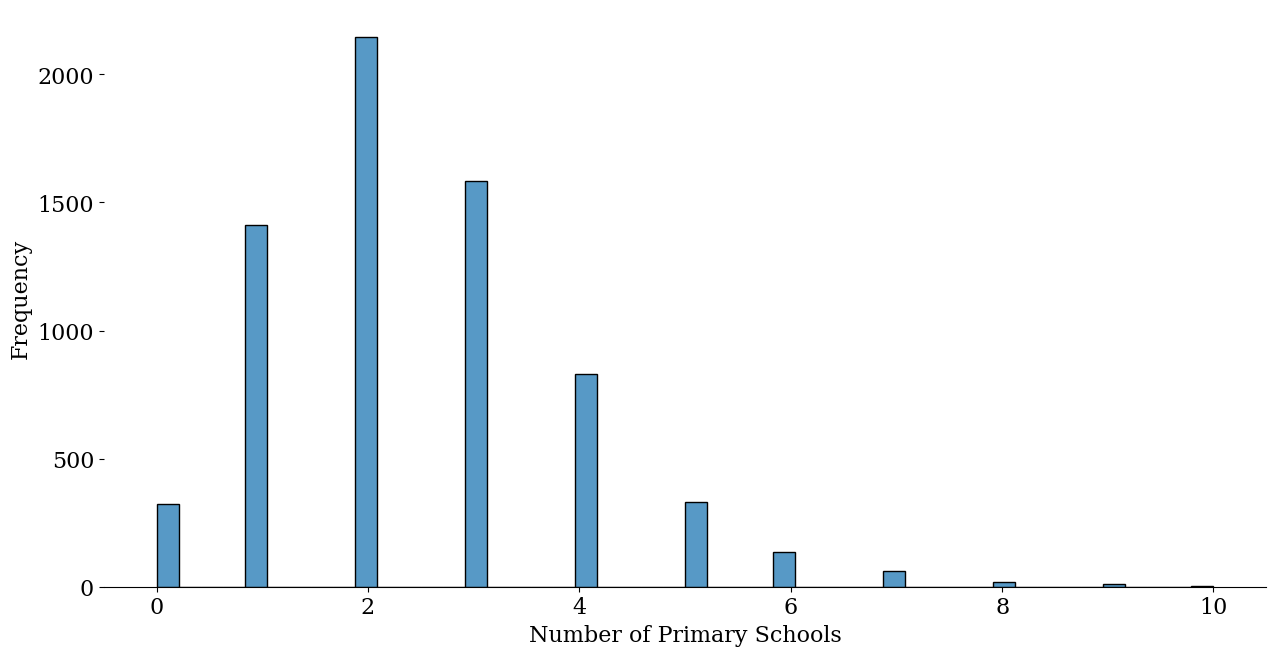

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 7.5))
font = {
    # 'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 16
}

sns.histplot(gdf_2['primary'], ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Number of Primary Schools')
ax.set_ylabel('Frequency')
# ax.xticks=list(range(10))
fig.savefig(OUT / "n_schools_hist.png", dpi=100, bbox_inches='tight')

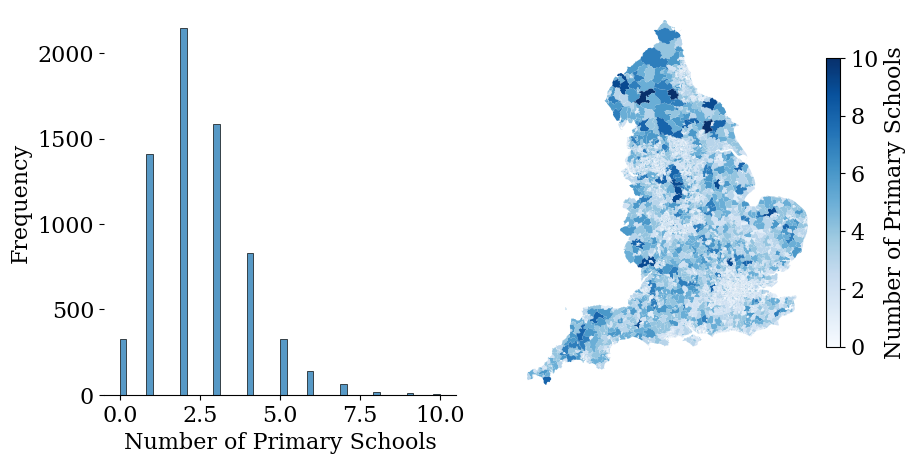

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(gdf_2['primary'], ax=ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Number of Primary Schools')
ax[0].set_ylabel('Frequency')
ax[0].yticks=list(range(10))

gdf_2.plot(column='primary', legend=True, cmap='Blues',  legend_kwds={'label': "Number of Primary Schools", 'shrink':0.75}, ax=ax[1])
ax[1].set_axis_off()
ax[1].margins(-0.00)
# ax[1].set_xlabel('Number of Primary Schools')

# ax.set_title('Number of Primary Schools')
fig.savefig(OUT / "n_schools.png", dpi=300, bbox_inches='tight')

<Axes: >

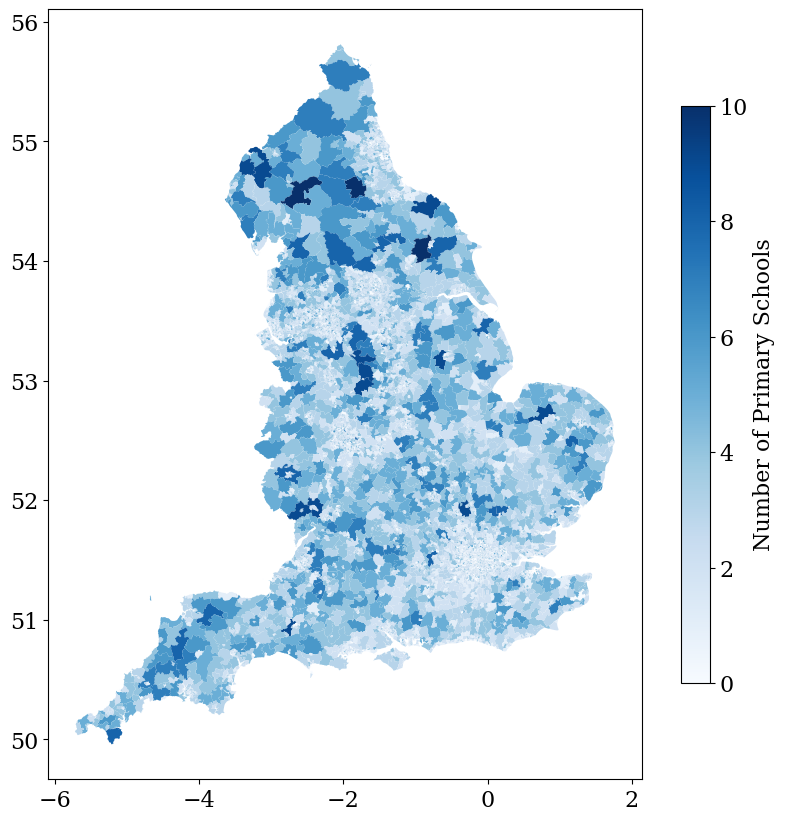

In [19]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_2.plot(column='primary', legend=True, cmap='Blues',  legend_kwds={'label': "Number of Primary Schools", 'shrink':0.75}, ax=ax)

In [20]:
gdf_2.log_school_capacity.describe()

count    6855.000000
mean        6.239620
std         1.491260
min         0.000000
25%         6.115892
50%         6.526495
75%         6.874198
max         8.631236
Name: log_school_capacity, dtype: float64

<Axes: >

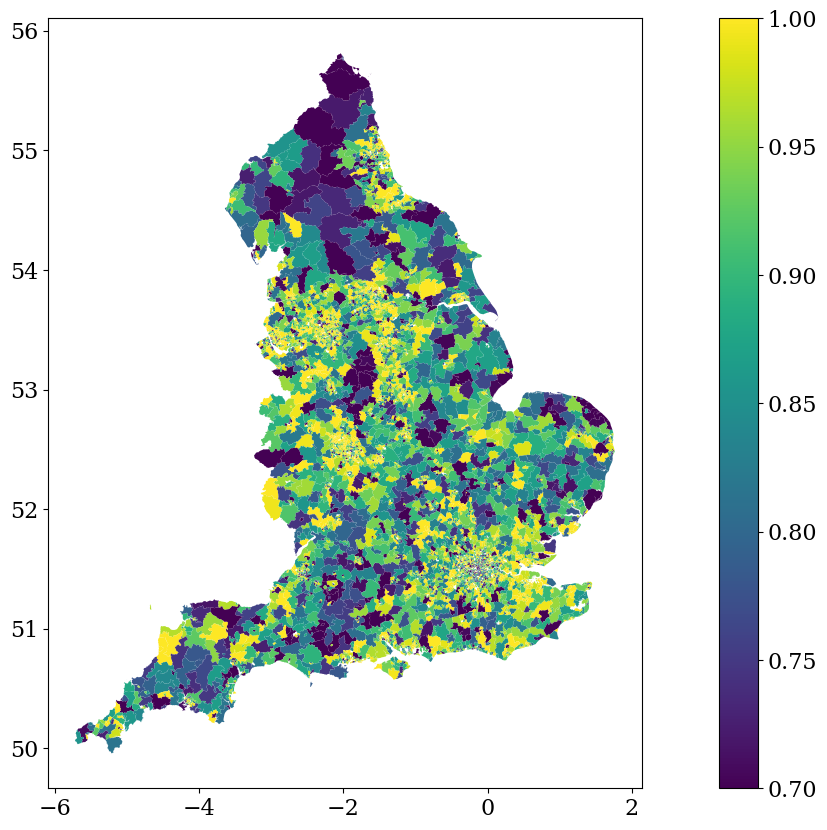

In [21]:
gdf_3 = gdf_2[gdf_2.school_capacity != 0]
gdf_3 = gdf_3.dropna(subset=["school_capacity"])

# .dropna(subset="school_utilisation").school_utilisation.describe()
gdf_3['school_utilisation'] = gdf_3.number_of_pupils / gdf_2['school_capacity'] 
fig, ax = plt.subplots(figsize=(20, 10))
gdf_3.plot(column='school_utilisation', ax=ax, legend=True, vmax=1, vmin=0.7)

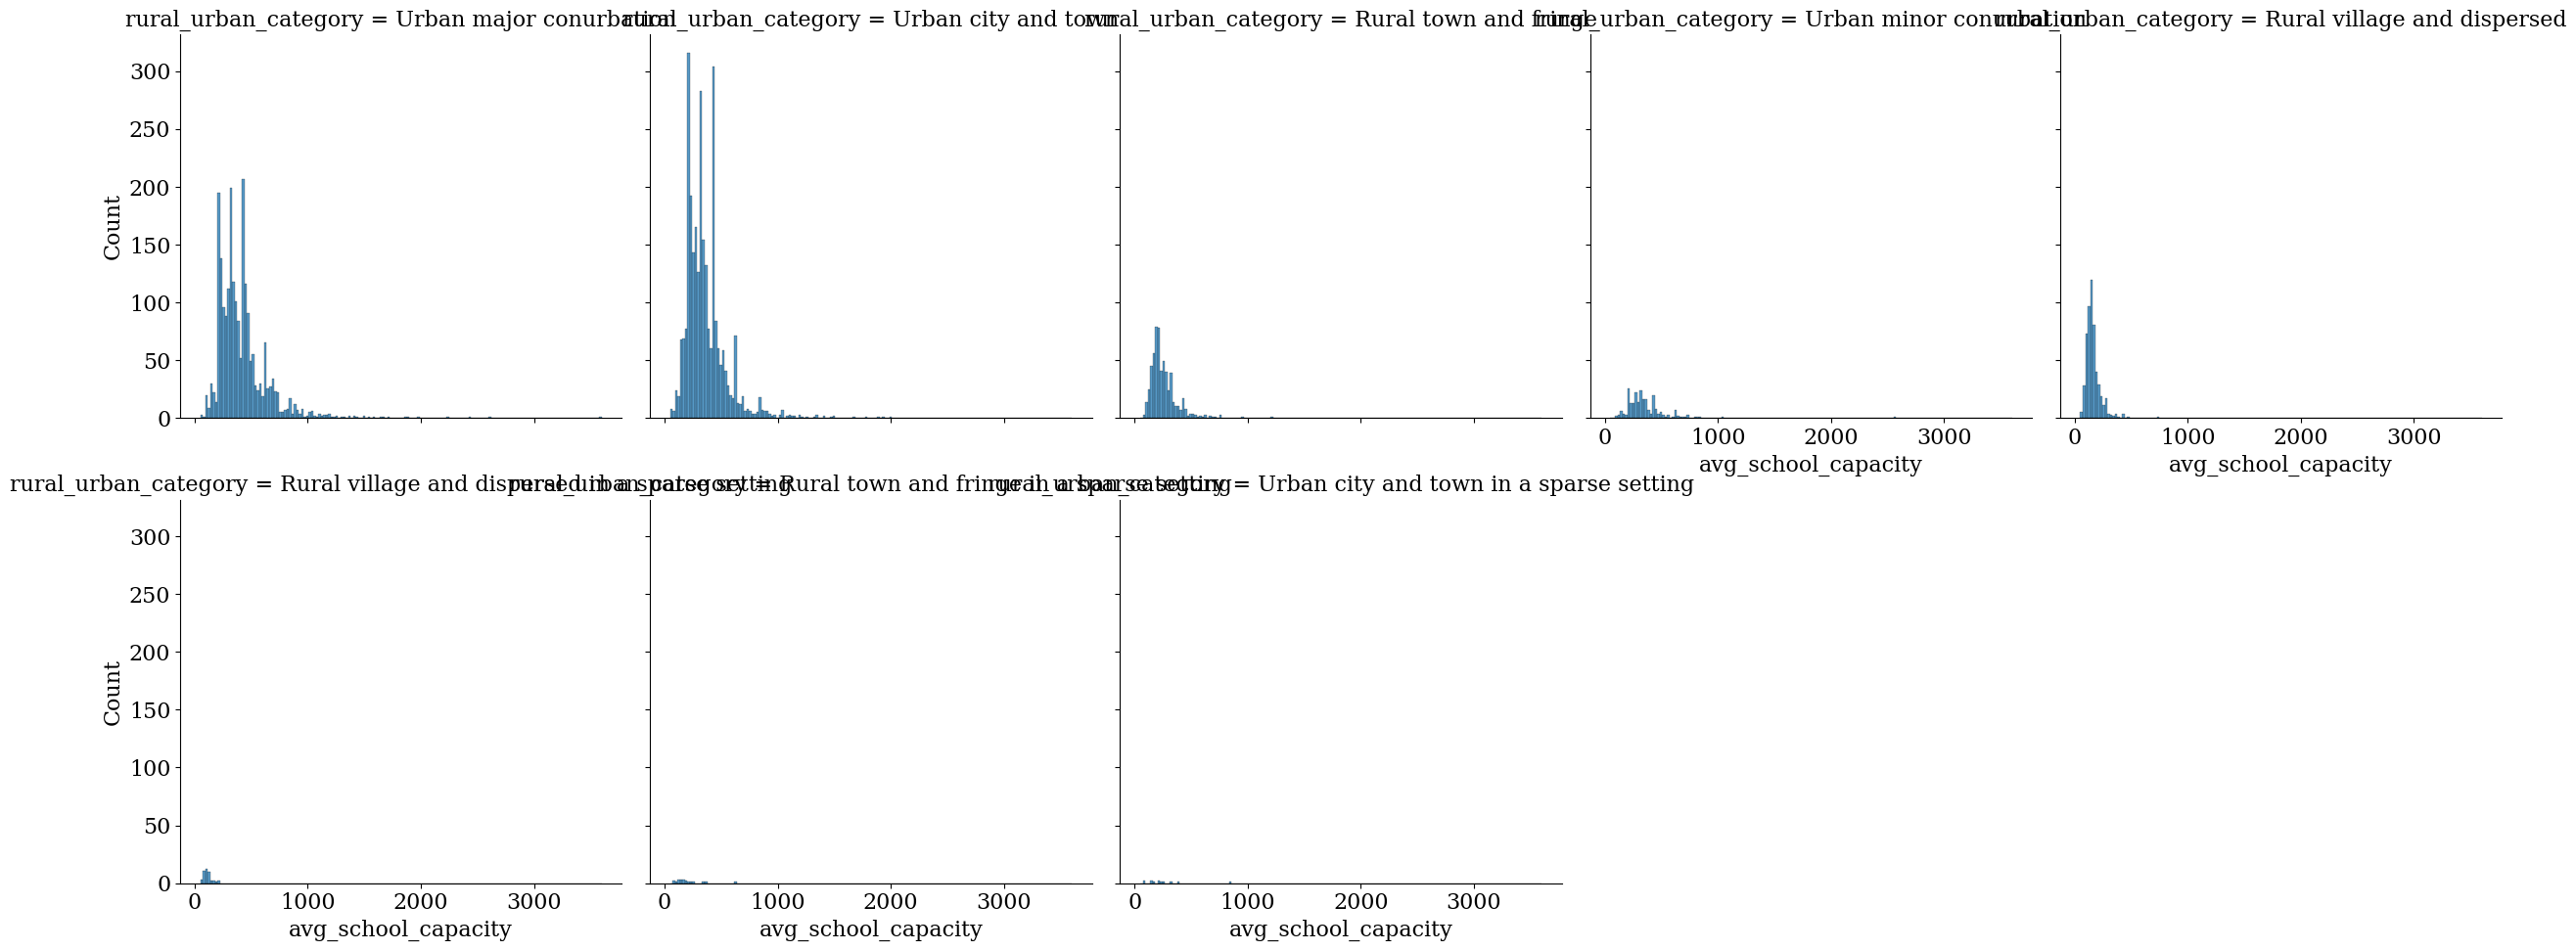

In [22]:
gdf_3['avg_school_capacity'] = gdf_3['school_capacity'] / gdf_3['primary']
sns.displot(gdf_3, x='avg_school_capacity', col='rural_urban_category', col_wrap=5)

In [23]:
gdf_3.groupby("rural_urban_category").avg_school_capacity.describe()

,count,mean,std,min,25%,50%,75%,max
rural_urban_category,,,,,,,,
Rural town and fringe,589.0,inf,NaN,89.00,182.000000,222.750000,296.333333,inf
Rural town and fringe in a sparse setting,20.0,201.954583,124.902204,92.00,122.000000,169.000000,215.000000,630.0
Rural village and dispersed,540.0,161.669408,65.235762,49.50,121.575000,149.333333,180.250000,733.0
Rural village and dispersed in a sparse setting,43.0,111.802344,34.192401,61.50,89.611111,105.000000,125.083333,218.0
Urban city and town,2833.0,inf,NaN,50.00,240.000000,321.000000,420.000000,inf
Urban city and town in a sparse setting,12.0,257.433333,203.852088,77.25,153.675000,210.000000,277.625000,840.0
Urban major conurbation,2252.0,inf,NaN,50.00,277.250000,369.750000,480.000000,inf
Urban minor conurbation,238.0,358.100060,205.122782,95.00,250.875000,315.000000,420.000000,2570.0


# Check the Moran stat

In [24]:
w = Queen.from_dataframe(gdf_2)
moran_capacity = Moran(gdf_2.school_capacity, w)
moran_n_schools = Moran(gdf_2.primary, w)

print(moran_capacity.I, moran_capacity.p_sim)
print(moran_n_schools.I, moran_n_schools.p_sim)

/var/folders/6h/pq_v8g215v52_jm4968ld4080000gn/T/ipykernel_73246/2686098170.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_2)
/Users/toby/anaconda3/envs/connectivity-analysis/lib/python3.11/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


0.026725713291695343 0.001
0.20033427366196366 0.001


In [25]:
# Check it after accounting log schools

w = Queen.from_dataframe(gdf_2)
moran_capacity = Moran(gdf_2.log_school_capacity+1, w)
moran_n_schools = Moran(gdf_2.primary, w)

print(moran_capacity.I, moran_capacity.p_sim)
print(moran_n_schools.I, moran_n_schools.p_sim)

/var/folders/6h/pq_v8g215v52_jm4968ld4080000gn/T/ipykernel_73246/2418929215.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_2)


-0.01810288897940915 0.006
0.20033427366196366 0.001
